# Exploratory Data Analysis for Togo Solar Dataset
This notebook performs an end-to-end analysis of the Togo solar dataset, including data cleaning, visualization, and preparation for comparison tasks.

# Import Required Libraries
Import the necessary libraries for data analysis and visualization, including pandas, numpy, matplotlib, seaborn, and others.

# Load Required Libraries
Import the necessary libraries such as pandas, NumPy, and Matplotlib for data manipulation and visualization.

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load and Inspect the Dataset
Load the Togo dataset into a pandas DataFrame, display the first few rows, and check the dataset's structure, including column names and data types.

In [21]:
# Load the dataset
file_path = '../src/data/togo-dapaong_qc.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check the structure of the dataset
print(df.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.

# Summary Statistics & Missing-Value Report
Generate summary statistics for numeric columns, calculate missing values, and list columns with more than 5% nulls.

In [25]:
# Generate summary statistics
print("Summary Statistics:")
print(df.describe())

# Calculate missing values
print("\nMissing Values:")
missing_values = df.isna().sum()
print(missing_values)

# List columns with more than 5% nulls
columns_with_nulls = missing_values[missing_values > len(df) * 0.05].index.tolist()
print("\nColumns with >5% nulls:", columns_with_nulls)

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  515748.000000  515748.000000  515748.000000  515748.000000   
mean      437.434390     147.281791     112.428381     218.378342   
std       223.430582     246.976925     151.284048     310.646797   
min         0.000000       0.000000       0.000000       0.000000   
25%       412.200000       0.000000       0.000000       0.000000   
50%       430.300000       0.000000       1.400000       2.700000   
75%       430.300000     235.525000     210.800000     402.100000   
max      1127.000000     904.100000     586.000000    1171.200000   

                ModB           Tamb             RH             WS  \
count  515748.000000  515748.000000  515748.000000  515748.000000   
mean      212.035419      27.725076      55.168625       2.311194   
std       301.397014       4.759027      28.709777       1.378053   
min         0.000000      14.900000       3.300000       0.000000   
25%         0

# Outlier Detection & Basic Cleaning
Detect missing values, outliers, or incorrect entries in key columns. Compute Z-scores, flag rows with |Z| > 3, and clean the data.

In [27]:
# Replace negative values in GHI, DNI, and DHI with NaN
columns_to_check_negatives = ['GHI', 'DNI', 'DHI']
df[columns_to_check_negatives] = df[columns_to_check_negatives].apply(lambda col: col.map(lambda x: x if x >= 0 else np.nan))

# Drop the 'Comments' column if it exists
if 'Comments' in df.columns:
    df = df.drop(columns=['Comments'])

# Debugging: Print rows after replacing negatives
print(f"Rows after replacing negatives: {len(df)}")

# Handle missing values (drop or impute)
columns_to_impute = ['GHI', 'DNI', 'DHI']
for col in columns_to_impute:
    df[col] = df[col].fillna(df[col].median())

# Debugging: Print rows after imputing missing values
print(f"Rows after imputing missing values: {len(df)}")

df = df.dropna(thresh=len(df.columns) * 0.95)  # Drop rows with more than 5% missing values

# Debugging: Print rows after dropping rows with >5% missing values
print(f"Rows after dropping rows with >5% missing values: {len(df)}")

# Detect and handle outliers using Z-scores
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(zscore(df[columns_to_check]))
outliers = (z_scores > 3)

df = df[(~outliers).all(axis=1)]  # Remove outliers

# Debugging: Print rows after removing outliers
print(f"Rows after removing outliers: {len(df)}")

# Save the cleaned dataset
output_path = '../src/data/togo_clean.csv'
if not df.empty:
    df.to_csv(output_path, index=False)
    print(f"Cleaned data saved to {output_path}")
else:
    print("DataFrame is empty. No data to save.")

Rows after replacing negatives: 515748
Rows after imputing missing values: 515748
Rows after dropping rows with >5% missing values: 515748
Rows after removing outliers: 512038
Rows after removing outliers: 512038
Cleaned data saved to ../src/data/togo_clean.csv
Cleaned data saved to ../src/data/togo_clean.csv


# Investigate Outlier Detection
Analyze the rows flagged as outliers to understand why so few rows were dropped.

Number of rows flagged as outliers: 3710

Sample Outlier Rows:
            Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
561  2021-10-25 09:22  651.1  142.4  570.9  661.0  653.7  29.5  74.4  2.6   
562  2021-10-25 09:23  659.3  142.5  575.4  664.2  656.8  29.5  74.9  2.6   
563  2021-10-25 09:24  617.6   86.1  575.8  621.9  615.1  29.5  74.3  3.6   
564  2021-10-25 09:25  600.9   65.4  573.9  603.8  597.2  29.5  74.4  2.7   
565  2021-10-25 09:26  591.1   57.3  569.3  593.3  586.9  29.5  74.8  2.7   

     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
561     3.1      0.4  225.5     16.3  979         0            0.0   44.0   
562     3.6      0.5  225.5     20.7  979         0            0.0   44.5   
563     4.4      0.5  237.4      6.4  979         0            0.0   44.9   
564     3.6      0.6  240.0     14.8  979         0            0.0   45.0   
565     3.9      0.5  262.6     11.8  979         0            0.0   44.9   

     TModB 

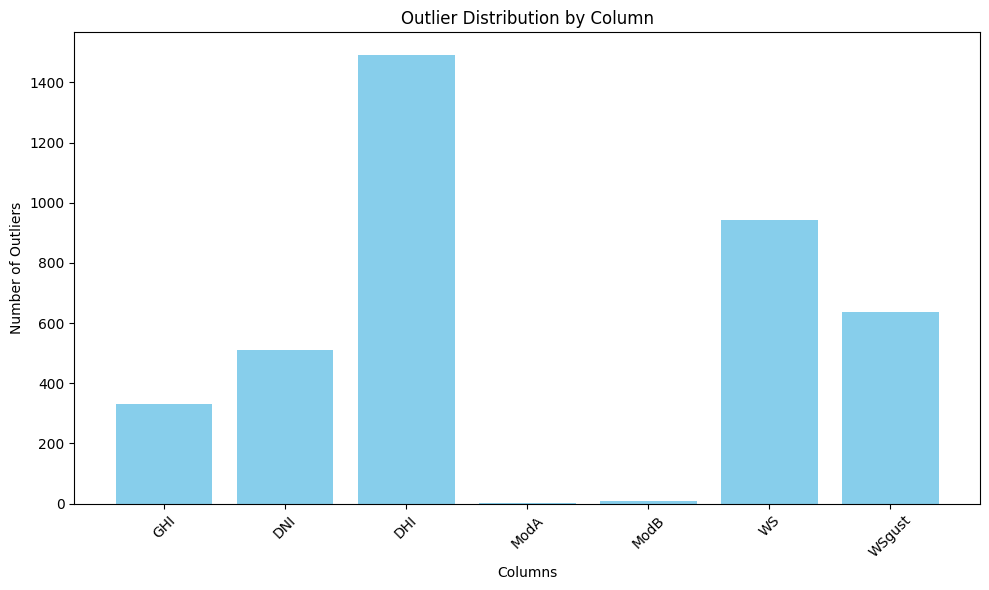

In [24]:
# Recompute Z-scores after filtering the DataFrame
z_scores = np.abs(zscore(df[columns_to_check]))

# Investigate rows flagged as outliers
outlier_rows = df[(z_scores > 3).any(axis=1)]
print("Number of rows flagged as outliers:", len(outlier_rows))

# Display a sample of the outlier rows
print("\nSample Outlier Rows:")
print(outlier_rows.head())

# Analyze the distribution of outliers per column
print("\nOutlier Distribution by Column:")
outlier_distribution = {}
for col in columns_to_check:
    num_outliers = (z_scores[:, columns_to_check.index(col)] > 3).sum()
    outlier_distribution[col] = num_outliers
    print(f"{col}: {num_outliers} outliers")

# Visualize the distribution of outliers per column
plt.figure(figsize=(10, 6))
plt.bar(outlier_distribution.keys(), outlier_distribution.values(), color='skyblue')
plt.title('Outlier Distribution by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time Series Analysis
Visualize patterns and trends in GHI, DNI, DHI, and Tamb over time to identify anomalies or seasonal variations.

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_7984\1872514131.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Kaleb\OneDrive\Desktop\Kifiya AI\Week 0\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


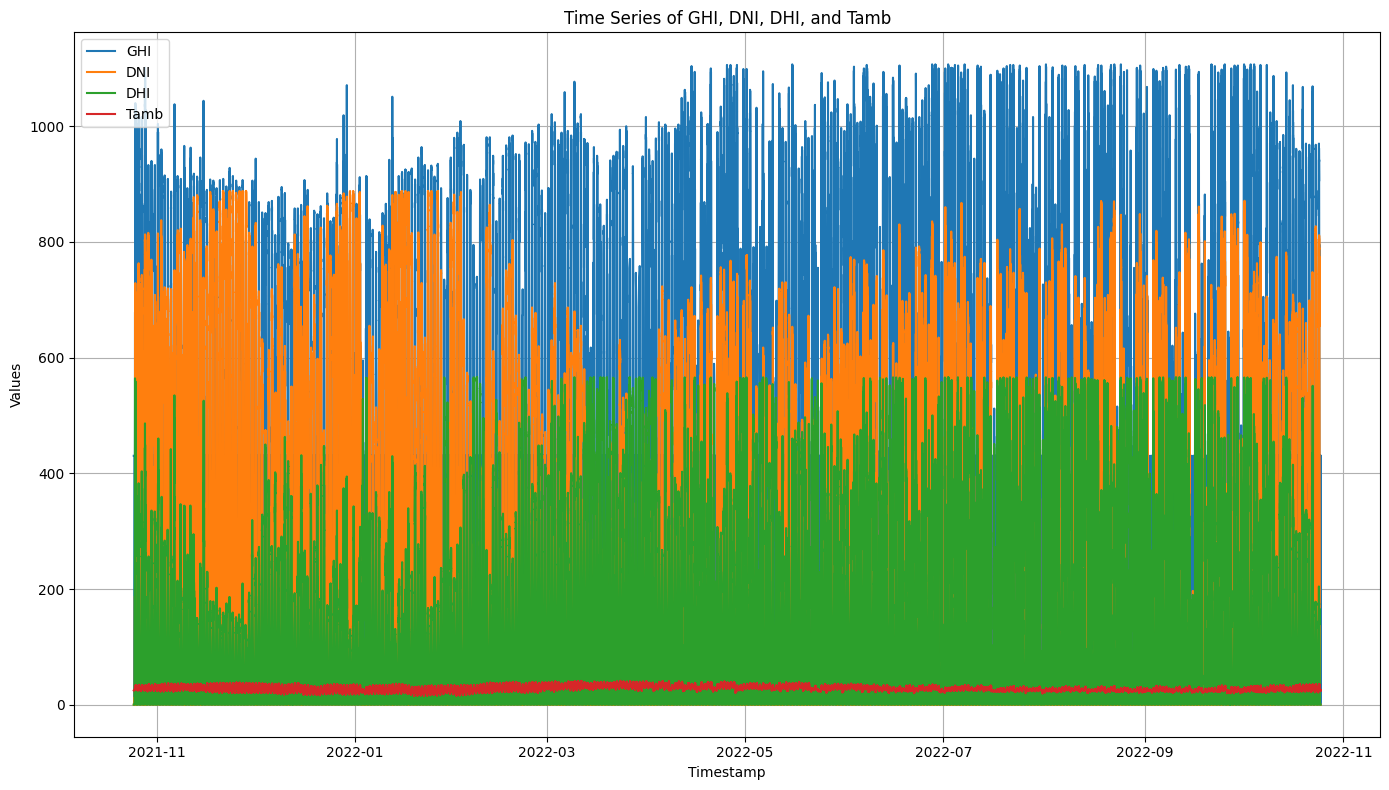

In [28]:
# Plot time series for GHI, DNI, DHI, and Tamb
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Ensure Timestamp is in datetime format
df.set_index('Timestamp', inplace=True)  # Set Timestamp as the index

plt.figure(figsize=(14, 8))
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Analyze Cleaning Impact
Group by the Cleaning flag and plot average ModA & ModB values before and after cleaning.

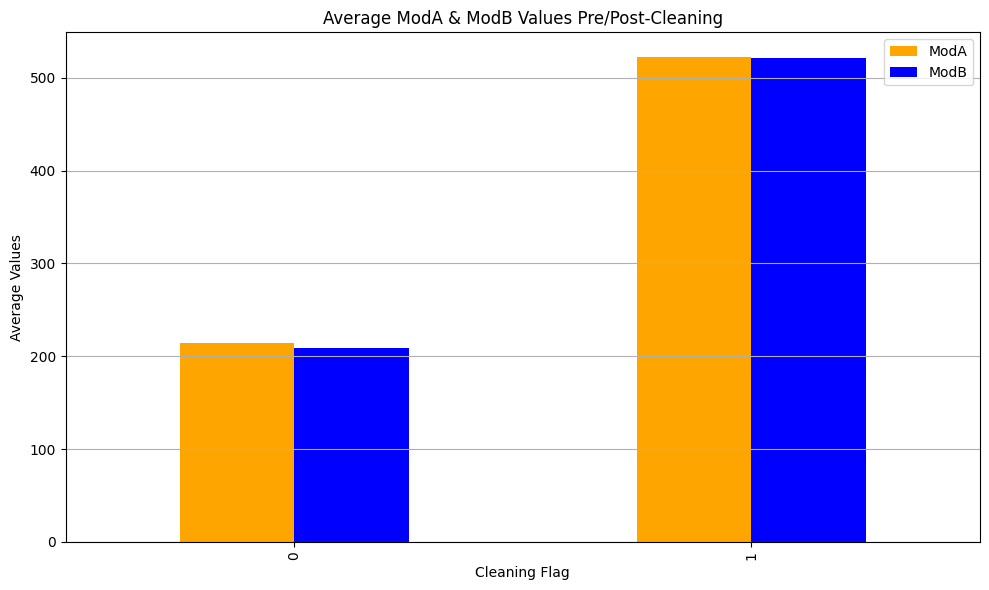

In [29]:
# Group by Cleaning flag and calculate average ModA & ModB values
cleaning_groups = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot average ModA & ModB values pre/post-cleaning
cleaning_groups.plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])
plt.title('Average ModA & ModB Values Pre/Post-Cleaning')
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Values')
plt.legend(['ModA', 'ModB'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Correlation and Relationship Analysis
Generate a heatmap of correlations and scatter plots for key relationships (e.g., WS vs. GHI, RH vs. Tamb).

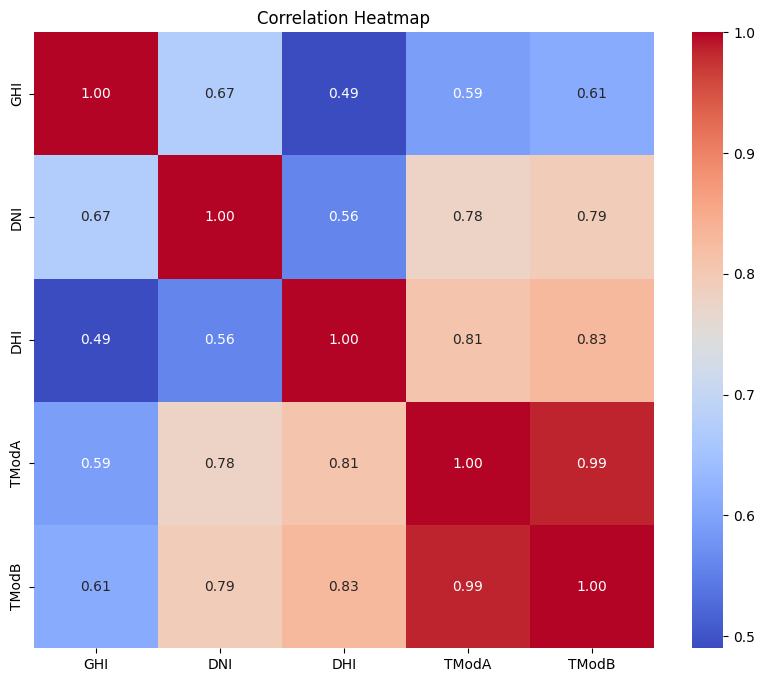

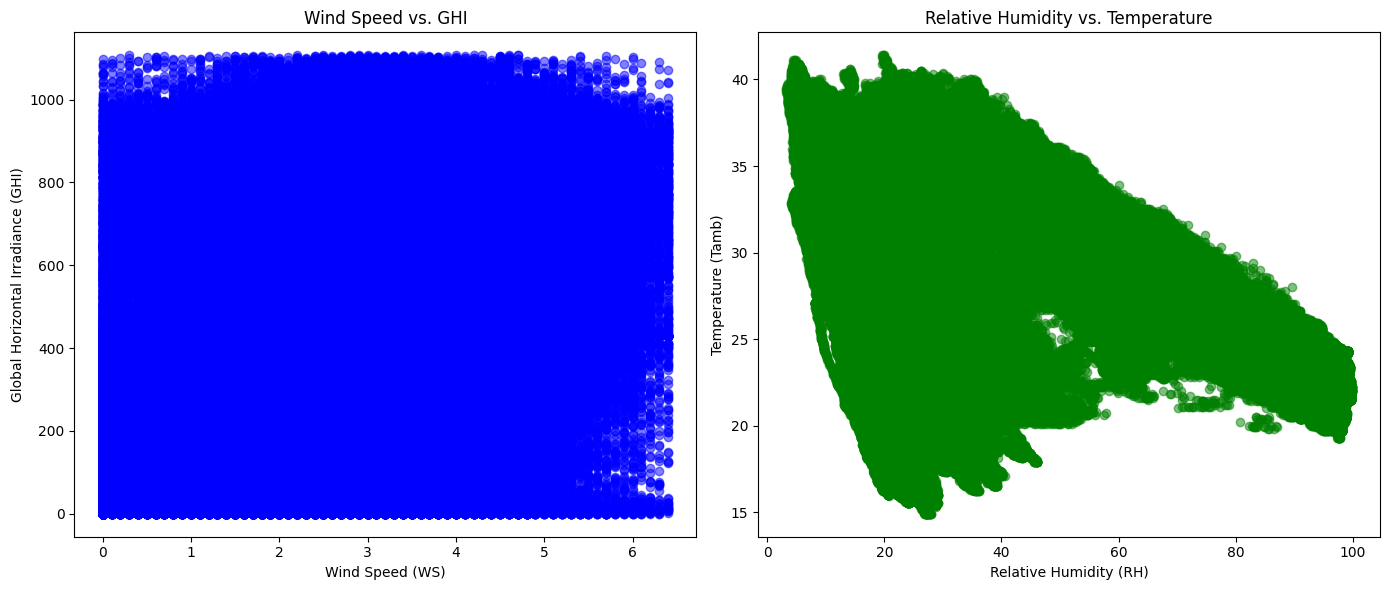

In [30]:
# Generate a heatmap of correlations
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for key relationships
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5, color='blue')
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('Global Horizontal Irradiance (GHI)')

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='green')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Temperature (Tamb)')

plt.tight_layout()
plt.show()

# Wind and Distribution Analysis
Create wind rose or radial bar plots for WS/WD and histograms for GHI and another variable.

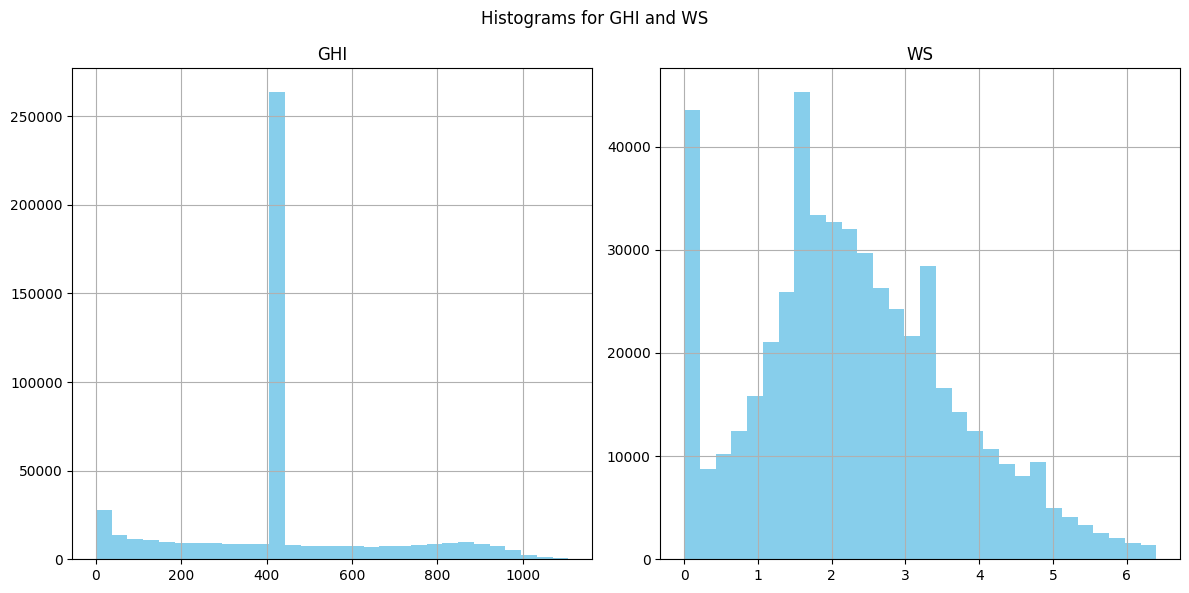

C:\Users\Kaleb\AppData\Local\Temp\ipykernel_7984\2593792039.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_rose_data = df.groupby([wd_bins, ws_bins]).size().unstack(fill_value=0)


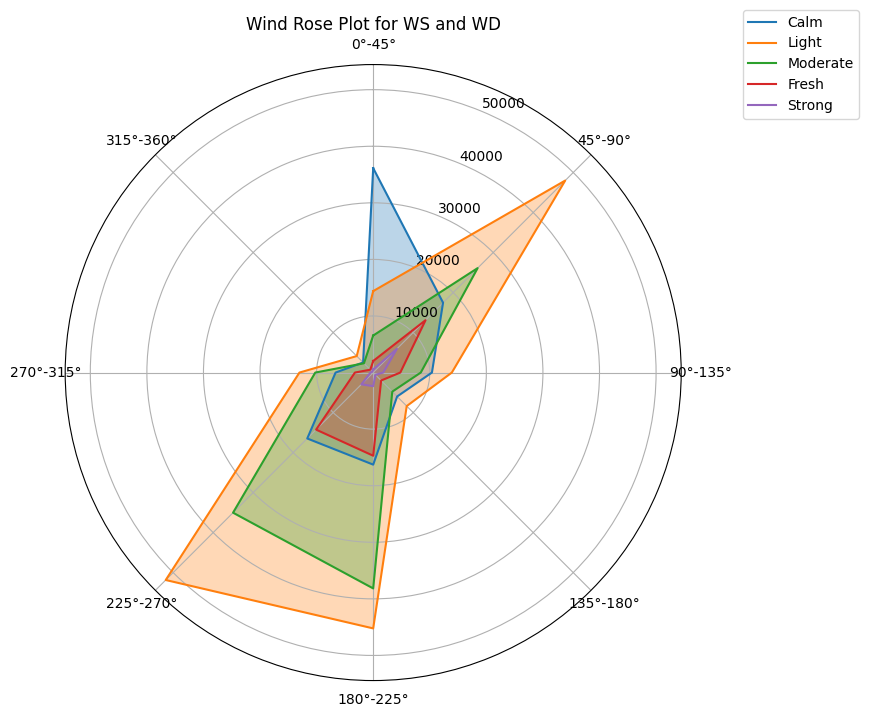

In [33]:
# Create histograms for GHI and WS
df[['GHI', 'WS']].hist(bins=30, figsize=(12, 6), color='skyblue')
plt.suptitle('Histograms for GHI and WS')
plt.tight_layout()
plt.show()

# Create a wind rose plot for WS and WD
import matplotlib.cm as cm
from math import pi

# Prepare data for wind rose
wd_bins = pd.cut(df['WD'], bins=8, labels=[f'{i*45}°-{(i+1)*45}°' for i in range(8)])
ws_bins = pd.cut(df['WS'], bins=5, labels=['Calm', 'Light', 'Moderate', 'Fresh', 'Strong'])
wind_rose_data = df.groupby([wd_bins, ws_bins]).size().unstack(fill_value=0)

# Plot wind rose
angles = [i * pi / 4 for i in range(8)]
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
for ws_bin in wind_rose_data.columns:
    values = wind_rose_data[ws_bin].values.tolist()
    values += values[:1]  # Close the circle
    ax.plot(angles, values, label=ws_bin)
    ax.fill(angles, values, alpha=0.3)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(wind_rose_data.index.categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Wind Rose Plot for WS and WD')
plt.show()

# Temperature Analysis
Examine how relative humidity (RH) influences temperature readings and solar radiation. Visualize the relationships using scatter plots and regression lines.

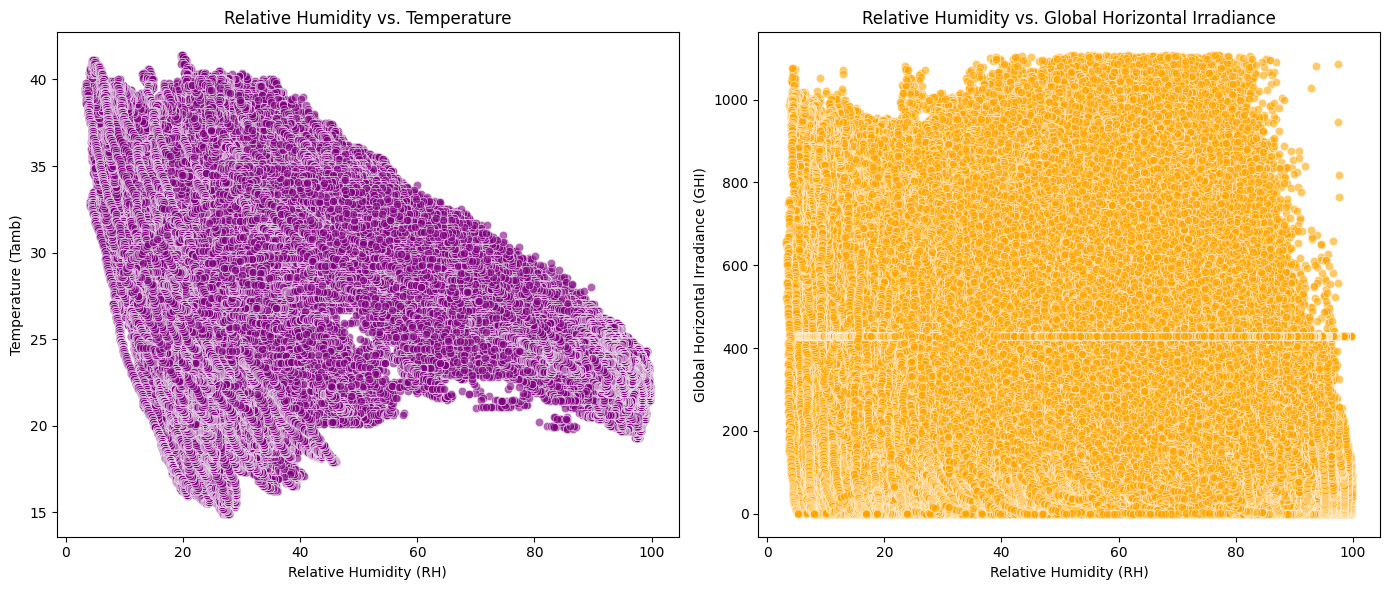

In [34]:
# Scatter plots for RH vs. Tamb and RH vs. GHI
plt.figure(figsize=(14, 6))

# RH vs. Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['RH'], y=df['Tamb'], alpha=0.6, color='purple')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Temperature (Tamb)')

# RH vs. GHI
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['RH'], y=df['GHI'], alpha=0.6, color='orange')
plt.title('Relative Humidity vs. Global Horizontal Irradiance')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Global Horizontal Irradiance (GHI)')

plt.tight_layout()
plt.show()

# Bubble Chart Analysis
Generate a bubble chart to visualize the relationship between GHI and Tamb, with bubble size representing RH or BP.

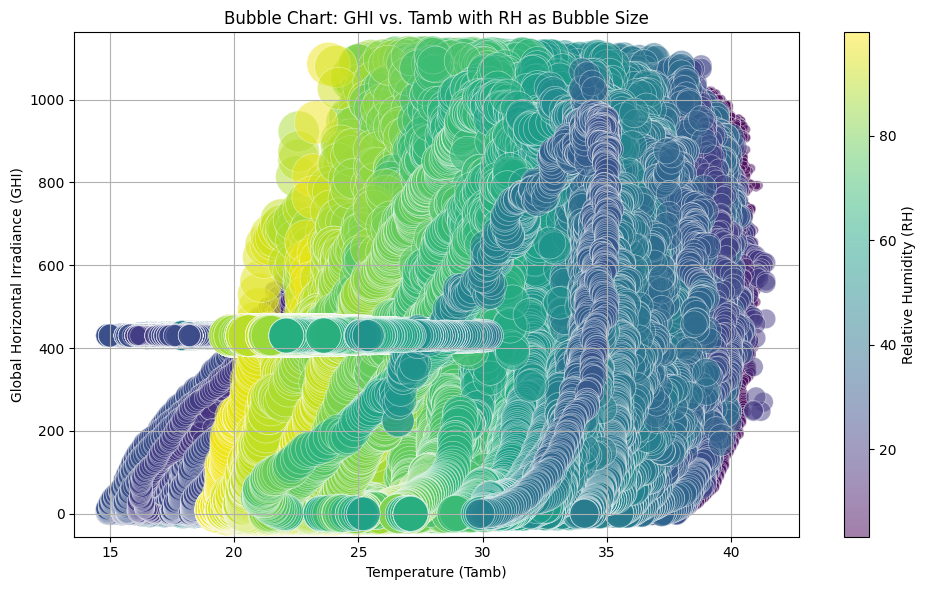

In [35]:
# Generate a bubble chart for GHI vs. Tamb with bubble size representing RH
plt.figure(figsize=(10, 6))

bubble_chart = plt.scatter(
    x=df['Tamb'],
    y=df['GHI'],
    s=df['RH'] * 10,  # Scale RH for better visualization
    alpha=0.5,
    c=df['RH'],
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(bubble_chart, label='Relative Humidity (RH)')
plt.title('Bubble Chart: GHI vs. Tamb with RH as Bubble Size')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.grid(True)
plt.tight_layout()
plt.show()